In [58]:
#Tratamrnto de Dados
import pandas as pd
import numpy as np

#Plotagem de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
np.random.seed(42)
num_stores = 4
num_items = 10
num_days = 365
store_names = ['Store {}'.format(i+1) for i in range(num_stores)]
item_names = ['Item {}'.format(i+1) for i in range(num_items)]

store_ids = np.random.randint(0, num_stores, num_days)
item_ids = np.random.randint(0, num_items, num_days)
sales = np.random.randint(50, 1000, num_days)
dates = pd.date_range(start='1/1/2022', periods=num_days)

df = pd.DataFrame({'date': dates, 'store': [store_names[i] for i in store_ids], 'item': [item_names[i] for i in item_ids], 'sales': sales})
df

,date,store,item,sales
0,2022-01-01,Store 3,Item 10,252
1,2022-01-02,Store 4,Item 3,813
2,2022-01-03,Store 1,Item 7,278
3,2022-01-04,Store 3,Item 10,725
4,2022-01-05,Store 3,Item 9,276
...,...,...,...,...
360,2022-12-27,Store 4,Item 6,565
361,2022-12-28,Store 1,Item 10,399
362,2022-12-29,Store 1,Item 5,892
363,2022-12-30,Store 2,Item 6,495


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   store   365 non-null    object        
 2   item    365 non-null    object        
 3   sales   365 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 11.5+ KB


In [74]:
(df.isnull().sum()/ df.shape[0] * 100).sort_values(ascending=False)

sales    0.0
item     0.0
store    0.0
date     0.0
dtype: float64

In [76]:
df['sales'].describe()

count    365.000000
mean     516.112329
std      283.184270
min       50.000000
25%      276.000000
50%      515.000000
75%      779.000000
max      995.000000
Name: sales, dtype: float64

In [78]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Weekday'] = df['date'].dt.weekday
df['Day'] = df['date'].dt.day

df_date = df.copy()
df_date

,date,store,item,sales,Year,Month,Weekday,Day
0,2022-01-01,Store 3,Item 10,252,2022,1,5,1
1,2022-01-02,Store 4,Item 3,813,2022,1,6,2
2,2022-01-03,Store 1,Item 7,278,2022,1,0,3
3,2022-01-04,Store 3,Item 10,725,2022,1,1,4
4,2022-01-05,Store 3,Item 9,276,2022,1,2,5
...,...,...,...,...,...,...,...,...
360,2022-12-27,Store 4,Item 6,565,2022,12,1,27
361,2022-12-28,Store 1,Item 10,399,2022,12,2,28
362,2022-12-29,Store 1,Item 5,892,2022,12,3,29
363,2022-12-30,Store 2,Item 6,495,2022,12,4,30


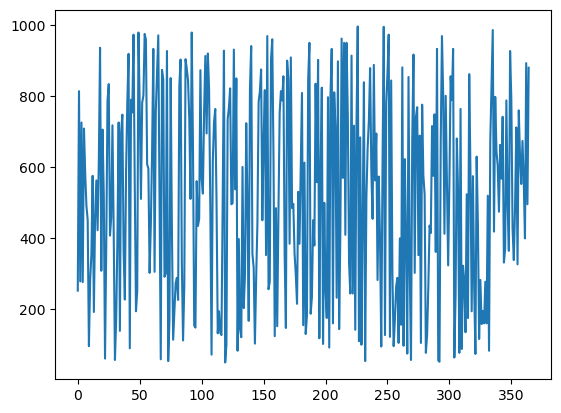

In [79]:
df_date['sales'].plot()

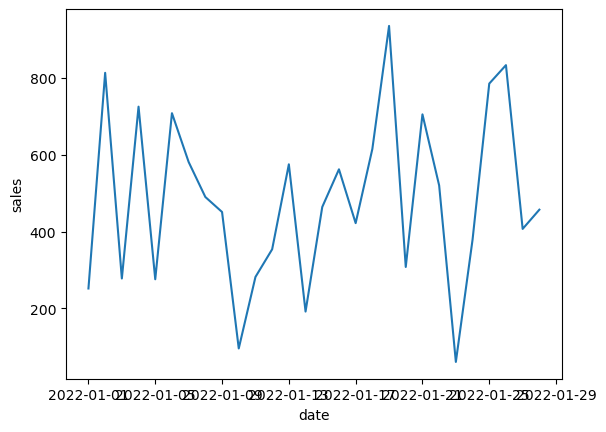

In [80]:
sns.lineplot(x='date', y='sales', data= df_date[:28])

In [82]:
df_monthly = df.groupby(df['date'].dt.strftime('%Y-%m'))['sales'].sum().reset_index()
df_monthly.rename(columns={'date': 'month'}, inplace=True)
df_monthly

,month,sales
0,2022-01,14722
1,2022-02,16635
2,2022-03,16359
3,2022-04,15940
4,2022-05,15804
5,2022-06,16492
6,2022-07,15365
7,2022-08,17786
8,2022-09,13300
9,2022-10,16945


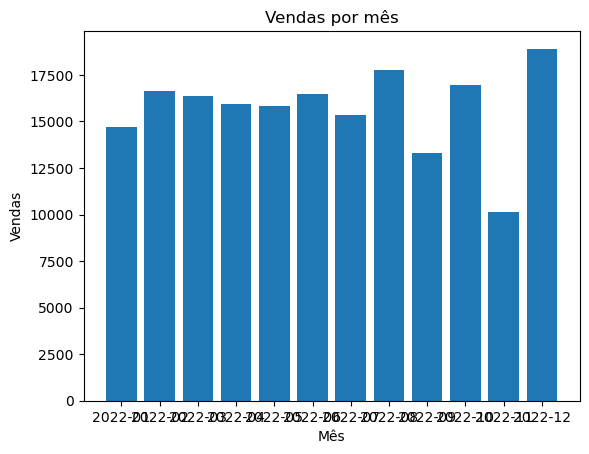

In [83]:
months = df_monthly['month']
sales = df_monthly['sales']

plt.bar(months, sales)
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas por mês')

plt.show()

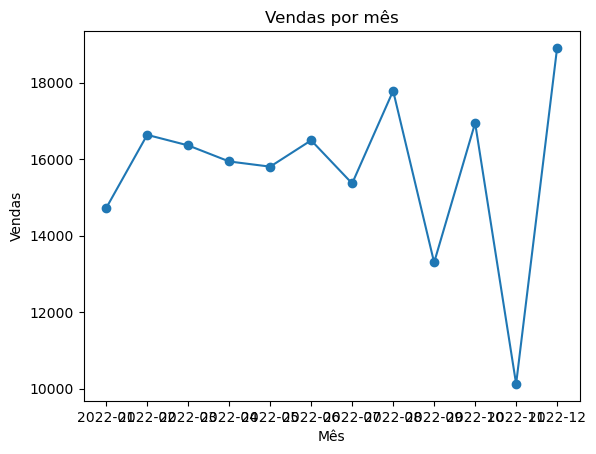

In [84]:
months = df_monthly['month']
sales = df_monthly['sales']

plt.plot(months, sales, 'o-')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.title('Vendas por mês')

plt.show()

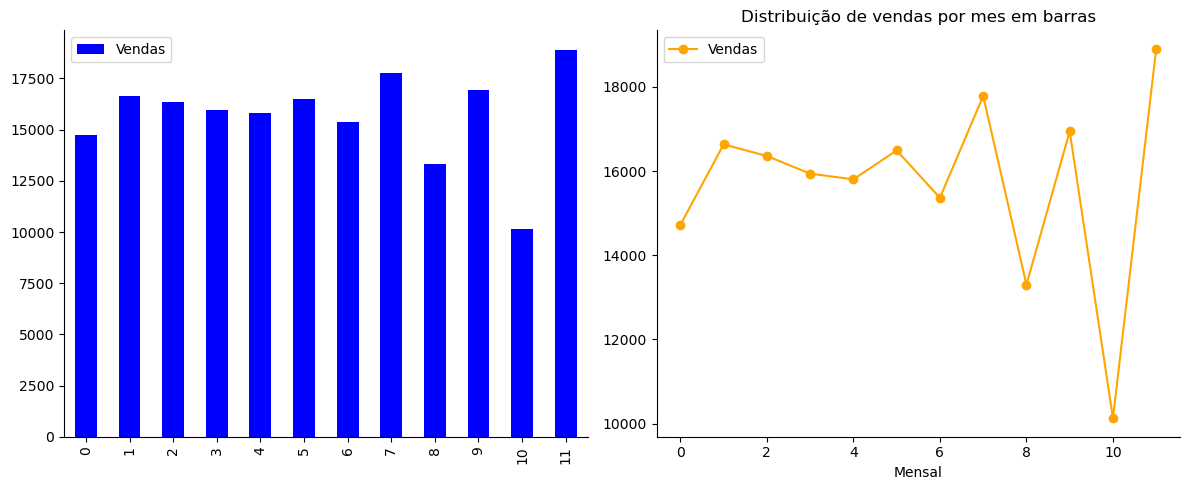

In [85]:
layout = (1,2)

raw = plt.subplot2grid(layout, (0,0))
law = plt.subplot2grid(layout, (0,1))

barras = df_monthly['sales'].plot(kind ='bar', color='blue', label='Vendas', ax=raw, figsize=(12,5))
linha = df_monthly['sales'].plot(marker= 'o', color='orange', label='Vendas', ax=law)

linha.set(xlabel = 'Anos',title= 'Distribuição de vendas por mes em linhas')
linha.set(xlabel = 'Mensal',title= 'Distribuição de vendas por mes em barras')

sns.despine()
plt.tight_layout()

linha.legend()
barras.legend()

In [88]:
'''Dados de vendas por loja'''

def sales_per_store(data):
    sales_by_store = data.groupby('store')['sales'].sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(8,6))
    sns.barplot(sales_by_store.store, sales_by_store.sales, color='darkblue')
    
    ax.set(xlabel = "Id Loja", ylabel = 'Soma das Vendas', title = 'Total de vendas por loja')
    
    return sales_by_store

/home/andre/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,store,sales
0,Store 1,44053
1,Store 2,40663
2,Store 3,49244
3,Store 4,54421


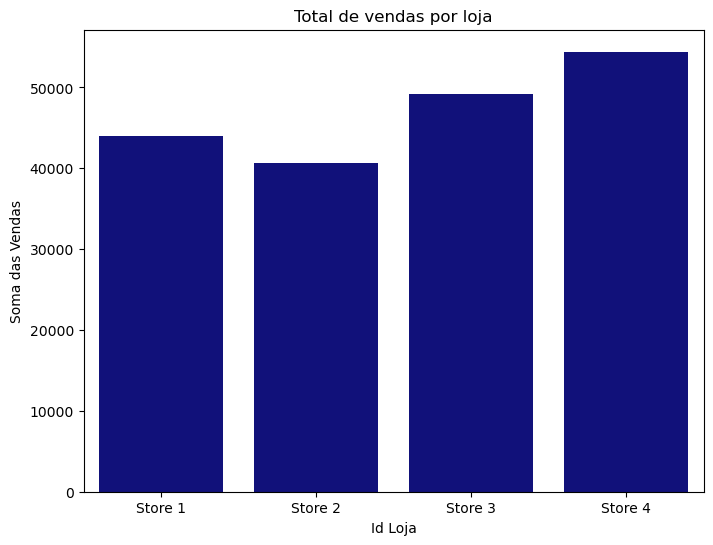

In [89]:
sales_per_store(df_date)